# Medtronic Boston Pair
### Entry Threshold:	2.00 | Exit Threshold:	0.50 | Max Duration:	10	
### MA Period:	60 | MA Type:	SMA	StdDev | Period:	60 | Total ROI:	58.06 % | CAGR:	36.11 %	 | Max. DD:	20.43 %
### Sharpe Ratio:	1.147

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [14]:
start= datetime.datetime(2017, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 9, 30)

In [15]:
ticker_1 = "MDT"
ticker_2 = "BSX"

In [16]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [17]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,110.480003,109.300003,110.000000,109.669998,6828600.0,109.669998
2019-09-16,109.790001,108.830002,109.500000,109.050003,3402100.0,109.050003
2019-09-17,110.029999,108.959999,109.050003,109.339996,4290900.0,109.339996
2019-09-18,110.320000,108.870003,109.500000,110.000000,5486000.0,110.000000
2019-09-19,111.730003,110.129997,110.330002,111.010002,3646400.0,111.010002


In [18]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,42.450001,41.560001,42.110001,41.810001,4535400,41.810001
2019-09-16,42.020000,41.450001,41.730000,41.939999,3097000,41.939999
2019-09-17,42.639999,41.959999,42.029999,42.320000,3935900,42.320000
2019-09-18,42.939999,42.279999,42.419998,42.900002,3971300,42.900002
2019-09-19,43.150002,42.790001,42.970001,43.060001,6465900,43.060001


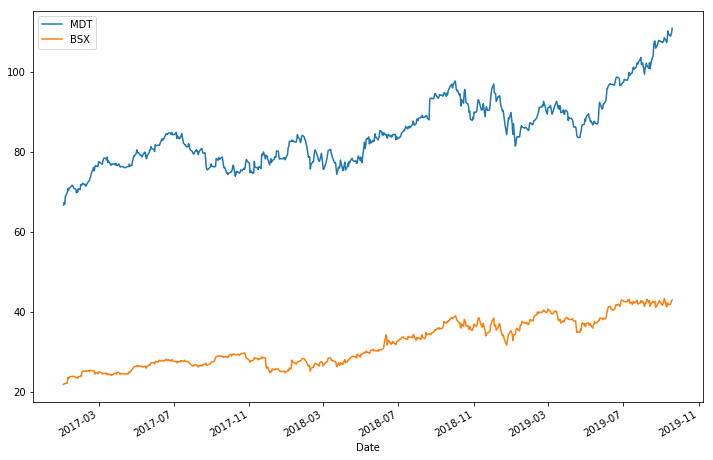

In [19]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [20]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

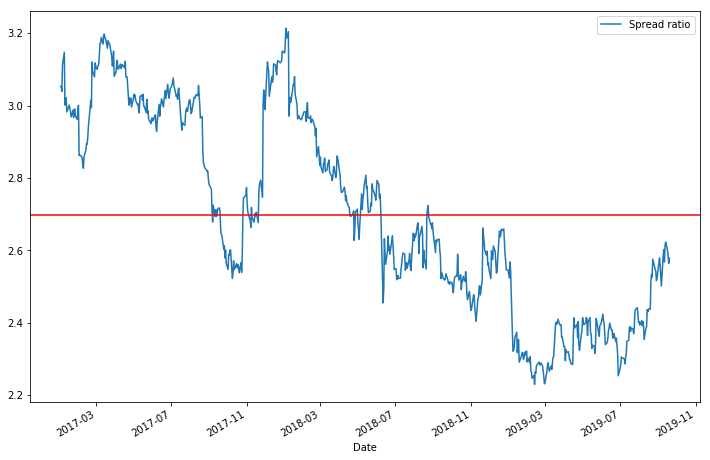

In [21]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [22]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

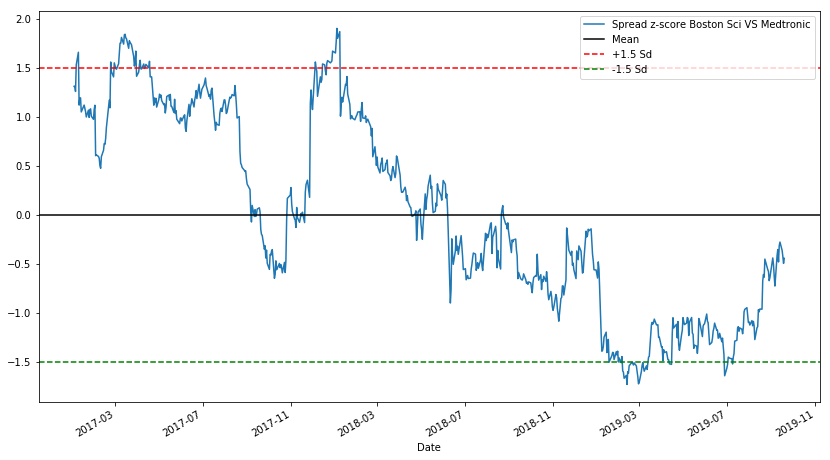

In [23]:
zscore(spread_ratio).plot(figsize=(14,8))
plt.axhline(zscore(spread_ratio).mean(), color='black')
plt.axhline(1.5, c='r', ls='--')
plt.axhline(-1.5, c='g', ls='--')
plt.legend(['Spread z-score Boston Sci VS Medtronic', 'Mean', '+1.5 Sd', '-1.5 Sd']);

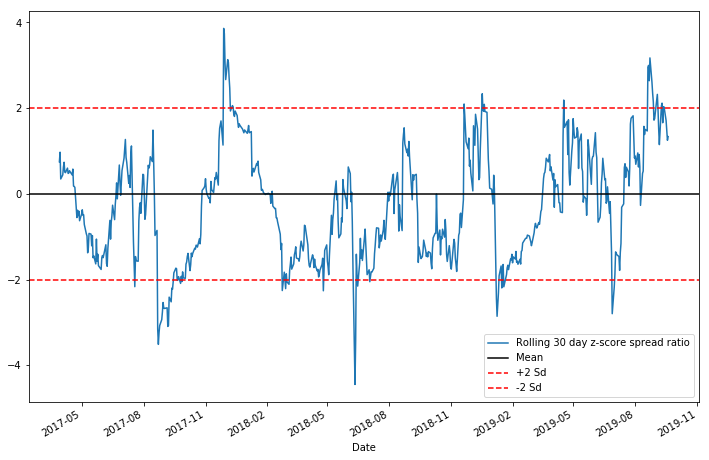

In [25]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(60).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.00, color='red', linestyle='--')
plt.axhline(-2.00, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2 Sd', '-2 Sd']);

In [26]:
from statsmodels.tsa.stattools import coint

In [27]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [28]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [29]:
print('----------Co-Integration Test-------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------Co-Integration Test-------------------
T-stat for the pair MDT VS BSX: -2.2017357117172827
Alpha value for the T-stat:  0.4234686210746786
--------------------------------------
T-stat 99%:  -3.912570586252268
T-stat 95%:  -3.345103760115582
T-stat 90%:  -3.0506746162313703


In [30]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.91087319],
       [0.91087319, 1.        ]])

In [31]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[76.93904359, 47.23924804],
       [47.23924804, 34.95773831]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [32]:
zscore_30_1_ratio

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-30         NaN
2017-01-31         NaN
2017-02-01         NaN
2017-02-02         NaN
2017-02-03         NaN
2017-02-06         NaN
2017-02-07         NaN
2017-02-08         NaN
2017-02-09         NaN
2017-02-10         NaN
2017-02-13         NaN
2017-02-14         NaN
                ...   
2019-08-08    0.631107
2019-08-09   -0.267987
2019-08-12    0.476607
2019-08-13    0.531702
2019-08-14    1.575068
2019-08-15    1.385867
2019-08-16    1.505281
2019-08-19    1.468267
2019-08-20    2.948947
2019-08-21    2.997808
2019-08-22    2.640358
2019-08-23    3.172440
2019-0

In [33]:
spread_ratio

Date
2017-01-03    3.053442
2017-01-04    3.054066
2017-01-05    3.039341
2017-01-06    3.112760
2017-01-09    3.147657
2017-01-10    3.001626
2017-01-11    3.021585
2017-01-12    3.021560
2017-01-13    2.982710
2017-01-17    3.001626
2017-01-18    2.993183
2017-01-19    2.983537
2017-01-20    2.968768
2017-01-23    2.987558
2017-01-24    2.967543
2017-01-25    2.988993
2017-01-26    2.991233
2017-01-27    2.970913
2017-01-30    2.962296
2017-01-31    2.989530
2017-02-01    3.001218
2017-02-02    2.861892
2017-02-03    2.864032
2017-02-06    2.859597
2017-02-07    2.854646
2017-02-08    2.834022
2017-02-09    2.826945
2017-02-10    2.859171
2017-02-13    2.876666
2017-02-14    2.895261
                ...   
2019-08-08    2.391955
2019-08-09    2.353472
2019-08-12    2.386015
2019-08-13    2.389174
2019-08-14    2.436157
2019-08-15    2.430141
2019-08-16    2.437960
2019-08-19    2.437529
2019-08-20    2.515529
2019-08-21    2.533255
2019-08-22    2.525884
2019-08-23    2.575905
2019-0

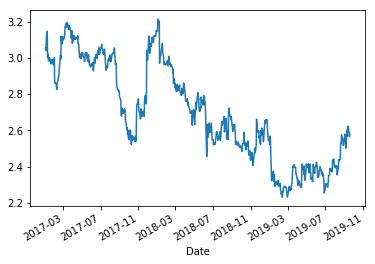

In [34]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)
spread_ratio.plot()

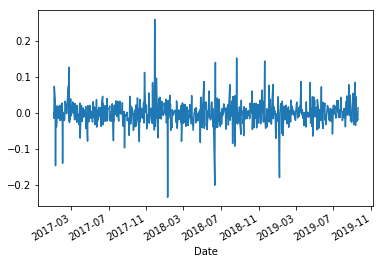

In [35]:
t_series_lag_1.plot()

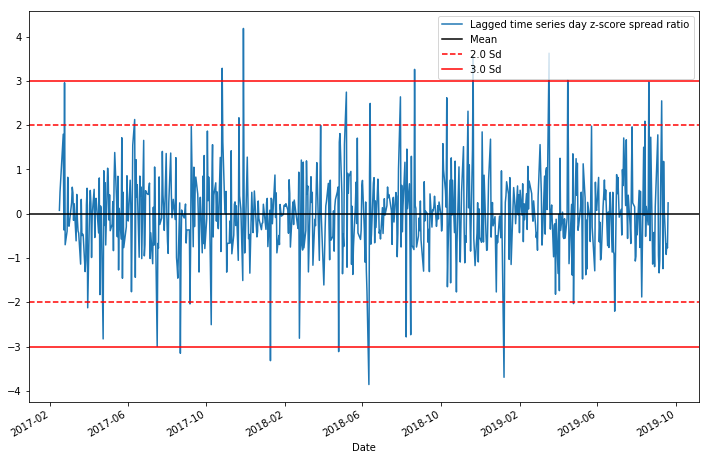

In [42]:
#1 day moving average of the price spread
spreadratio_t_series_lag_mavg_1 = t_series_lag_1.rolling(1).mean()

# Timeseries with one lag
spreadratio_t_series_lag_mavg_30 = t_series_lag_1.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_dev_ratio = t_series_lag_1.rolling(30).std()

# Compute the z score for each day
zscore_t_series_lag = (spreadratio_t_series_lag_mavg_1 - spreadratio_t_series_lag_mavg_30)/std_dev_ratio



zscore_t_series_lag.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

In [41]:
zscore_t_series_lag

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-30         NaN
2017-01-31         NaN
2017-02-01         NaN
2017-02-02         NaN
2017-02-03         NaN
2017-02-06         NaN
2017-02-07         NaN
2017-02-08         NaN
2017-02-09         NaN
2017-02-10         NaN
2017-02-13         NaN
2017-02-14         NaN
                ...   
2019-08-08   -0.668483
2019-08-09   -1.878677
2019-08-12    1.502966
2019-08-13   -0.036422
2019-08-14    2.090373
2019-08-15   -0.511100
2019-08-16    0.165261
2019-08-19   -0.251699
2019-08-20    2.976348
2019-08-21    0.427884
2019-08-22   -0.605937
2019-08-23    1.729047
2019-0

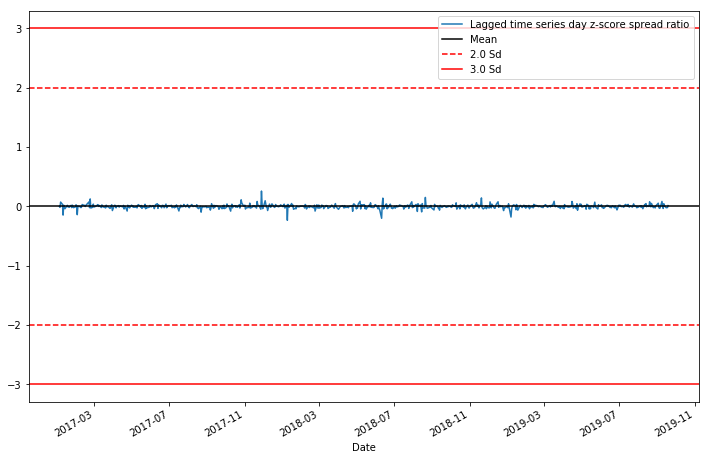

In [43]:
t_series_lag_1.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);